In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn. model_selection import TimeSeriesSplit
from sklearn. metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn. preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from tensorflow.keras.utils import plot_model
import yfinance as yf

In [2]:
msft = yf.Ticker("MSFT")

In [3]:
msft = msft.history(period = "max")

In [4]:
msft.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055241,0.063365,0.055241,0.060657,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060657,0.063907,0.060657,0.062823,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062823,0.064448,0.062823,0.063906,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063907,0.064448,0.061740,0.062281,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062281,0.062823,0.060657,0.061198,47894400,0.0,0.0


In [5]:
msft.index

DatetimeIndex(['1986-03-13 00:00:00-05:00', '1986-03-14 00:00:00-05:00',
               '1986-03-17 00:00:00-05:00', '1986-03-18 00:00:00-05:00',
               '1986-03-19 00:00:00-05:00', '1986-03-20 00:00:00-05:00',
               '1986-03-21 00:00:00-05:00', '1986-03-24 00:00:00-05:00',
               '1986-03-25 00:00:00-05:00', '1986-03-26 00:00:00-05:00',
               ...
               '2023-03-17 00:00:00-04:00', '2023-03-20 00:00:00-04:00',
               '2023-03-21 00:00:00-04:00', '2023-03-22 00:00:00-04:00',
               '2023-03-23 00:00:00-04:00', '2023-03-24 00:00:00-04:00',
               '2023-03-27 00:00:00-04:00', '2023-03-28 00:00:00-04:00',
               '2023-03-29 00:00:00-04:00', '2023-03-30 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=9338, freq=None)

<AxesSubplot:xlabel='Date'>

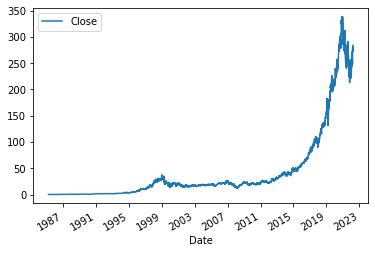

In [6]:
msft.plot.line(y = "Close", use_index=True)

In [7]:
msft.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,9338.000000,9338.000000,9338.000000,9338.000000,9.338000e+03,9338.000000,9338.000000
mean,41.922264,42.368968,41.464131,41.933402,5.795986e+07,0.002702,0.001821
std,68.855679,69.578389,68.094966,68.873086,3.825264e+07,0.044317,0.058970
min,0.055241,0.057407,0.055241,0.056324,2.304000e+06,0.000000,0.000000
25%,3.288870,3.344923,3.242565,3.300446,3.368605e+07,0.000000,0.000000
50%,19.044494,19.232449,18.855701,19.049589,5.118690e+07,0.000000,0.000000
75%,32.233554,32.560070,31.919769,32.243126,7.171545e+07,0.000000,0.000000
max,340.567792,345.558430,338.176288,339.075562,1.031789e+09,3.080000,2.000000


In [8]:
msft.isnull().any()

Open            False
High            False
Low             False
Close           False
Volume          False
Dividends       False
Stock Splits    False
dtype: bool

In [9]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9338 entries, 1986-03-13 00:00:00-05:00 to 2023-03-30 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          9338 non-null   float64
 1   High          9338 non-null   float64
 2   Low           9338 non-null   float64
 3   Close         9338 non-null   float64
 4   Volume        9338 non-null   int64  
 5   Dividends     9338 non-null   float64
 6   Stock Splits  9338 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 841.7 KB


In [10]:
print(msft.shape)

(9338, 7)


In [11]:
output = pd.DataFrame(msft['Close'])
features = ['Open', 'High', 'Low', 'Volume']

In [12]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(msft[features])
feature_transform = pd.DataFrame(columns = features, data = feature_transform, index = msft.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
1986-03-13 00:00:00-05:00,0.000000,0.000017,0.000000,1.000000
1986-03-14 00:00:00-05:00,0.000016,0.000019,0.000016,0.297096
1986-03-17 00:00:00-05:00,0.000022,0.000020,0.000022,0.127119
1986-03-18 00:00:00-05:00,0.000025,0.000020,0.000019,0.063588
1986-03-19 00:00:00-05:00,0.000021,0.000016,0.000016,0.044285


In [13]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output[:len(train_index)].values.ravel(), output[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [14]:
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1 , X_test.shape[1])


In [16]:

lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')


In [17]:
hist = lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1,shuffle=False)

Epoch 1/100
1062/1062 [==============================] - 4s 3ms/step - loss: 47.1663
Epoch 2/100
1062/1062 [==============================] - 3s 3ms/step - loss: 249.1076
Epoch 3/100
1062/1062 [==============================] - 2s 2ms/step - loss: 112.2393
Epoch 4/100
1062/1062 [==============================] - 2s 2ms/step - loss: 41.6939
Epoch 5/100
1062/1062 [==============================] - 2s 2ms/step - loss: 12.4276
Epoch 6/100
1062/1062 [==============================] - 2s 2ms/step - loss: 3.3610
Epoch 7/100
1062/1062 [==============================] - 2s 2ms/step - loss: 1.1533
Epoch 8/100
1062/1062 [==============================] - 2s 2ms/step - loss: 0.5611
Epoch 9/100
1062/1062 [==============================] - 2s 2ms/step - loss: 0.3671
Epoch 10/100
1062/1062 [==============================] - 2s 2ms/step - loss: 0.2933
Epoch 11/100
1062/1062 [==============================] - 2s 2ms/step - loss: 0.2622
Epoch 12/100
1062/1062 [==============================] - 2s 2ms/st

In [20]:
pred= lstm.predict(X_test)


27/27 [==============================] - 0s 2ms/step


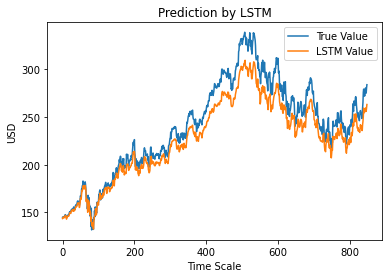

In [22]:
plt.plot(y_test, label='True Value')
plt.plot(pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('USD')
plt.legend()
plt.show()